# Python import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

# Load data

In [2]:
train = pd.read_csv('D:/[0] Study/[9] 데이터분석/DACON 컴퓨터 비전 학습 경진대회/train.csv')
test = pd.read_csv('D:/[0] Study/[9] 데이터분석/DACON 컴퓨터 비전 학습 경진대회/test.csv')

In [3]:
train.head()

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2


In [4]:
test.head()

,id,letter,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,...,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,...,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,...,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,...,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,...,4,3,1,4,0,2,1,2,3,4


# EDA

In [5]:
idx = 318
img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
digit = train.loc[idx, 'digit']
letter = train.loc[idx, 'letter']

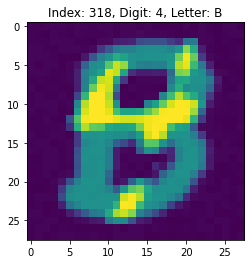

In [6]:
plt.title('Index: %i, Digit: %s, Letter: %s'%(idx, digit, letter))
plt.imshow(img)
plt.show()

# Train model

In [7]:
x_train = train.drop(['id', 'digit', 'letter'], axis=1).values
x_train = x_train.reshape(-1, 28, 28, 1)
x_train = x_train/255

In [8]:
y = train['digit']
y_train = np.zeros((len(y), len(y.unique())))
for i, digit in enumerate(y):
    y_train[i, digit] = 1

In [9]:
def create_cnn_model(x_train):
    inputs = tf.keras.layers.Input(x_train.shape[1:])

    bn = tf.keras.layers.BatchNormalization()(inputs)
    conv = tf.keras.layers.Conv2D(128, kernel_size=5, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(128, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)

    bn = tf.keras.layers.BatchNormalization()(pool)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)

    flatten = tf.keras.layers.Flatten()(pool)

    bn = tf.keras.layers.BatchNormalization()(flatten)
    dense = tf.keras.layers.Dense(1000, activation='relu')(bn)

    bn = tf.keras.layers.BatchNormalization()(dense)
    outputs = tf.keras.layers.Dense(10, activation='softmax')(bn)

    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

    return model

In [10]:
model = create_cnn_model(x_train)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
64/64 [==============================] - 25s 395ms/step - loss: 2.7051 - accuracy: 0.4238
Epoch 2/20
64/64 [==============================] - 26s 400ms/step - loss: 0.7998 - accuracy: 0.7393
Epoch 3/20
64/64 [==============================] - 25s 387ms/step - loss: 0.4943 - accuracy: 0.8306
Epoch 4/20
64/64 [==============================] - 25s 387ms/step - loss: 0.3202 - accuracy: 0.8911
Epoch 5/20
64/64 [==============================] - 25s 388ms/step - loss: 0.1723 - accuracy: 0.9443
Epoch 6/20
64/64 [==============================] - 25s 387ms/step - loss: 0.0991 - accuracy: 0.9707
Epoch 7/20
64/64 [==============================] - 27s 416ms/step - loss: 0.0759 - accuracy: 0.9751
Epoch 8/20
64/64 [==============================] - 25s 393ms/step - loss: 0.0747 - accuracy: 0.9775
Epoch 9/20
64/64 [==============================] - 26s 402ms/step - loss: 0.0628 - accuracy: 0.9819
Epoch 10/20
64/64 [==============================] - 30s 471ms/step - loss: 0.0770 - accura

## Predict

In [12]:
x_test = test.drop(['id', 'letter'], axis=1).values
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test/255

submission = pd.read_csv('D:/[0] Study/[9] 데이터분석/DACON 컴퓨터 비전 학습 경진대회/submission.csv')
submission['digit'] = np.argmax(model.predict(x_test), axis=1)
submission.head()

,id,digit
0,2049,6
1,2050,3
2,2051,6
3,2052,0
4,2053,3
